# Desenvolvimento de Modelo de Classificação de Dígitos Manuscritos com MNIST

Este notebook descreve o desenvolvimento de um modelo de classificação de dígitos manuscritos utilizando a base de dados MNIST. Vamos usar `RandomForestClassifier` do `sklearn` para construir o modelo. As etapas incluem a instalação de dependências, carregamento dos dados, visualização, pré-processamento, treinamento do modelo e avaliação de desempenho.


## Instalação das Dependências

In [1]:
!pip install --quiet -r requerimentos.txt


[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


## Carregamento da Base de Dados MNIST
Vamos carregar a base de dados MNIST. Esta base de dados contém imagens de dígitos manuscritos.

In [2]:
from sklearn.datasets import fetch_openml

In [3]:
dataset = fetch_openml("mnist_784")
dataset

{'data':        pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
 0           0       0       0       0       0       0       0       0       0   
 1           0       0       0       0       0       0       0       0       0   
 2           0       0       0       0       0       0       0       0       0   
 3           0       0       0       0       0       0       0       0       0   
 4           0       0       0       0       0       0       0       0       0   
 ...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
 69995       0       0       0       0       0       0       0       0       0   
 69996       0       0       0       0       0       0       0       0       0   
 69997       0       0       0       0       0       0       0       0       0   
 69998       0       0       0       0       0       0       0       0       0   
 69999       0       0       0       0       0       0       0       0       0   
 
      

In [4]:
X = dataset.data
y = dataset.target

print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


In [5]:
X.sample(5)

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
64458,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41656,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14914,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11372,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9589,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Visualização de um Dígito
Vamos visualizar um dos dígitos para entender melhor os dados.

In [6]:
numero_aleatorio = X.sample(random_state=45)
numero_aleatorio

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
48356,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


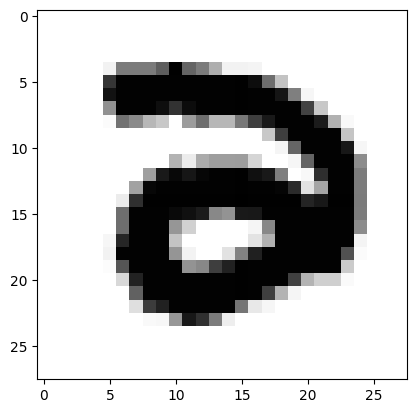

In [7]:
import matplotlib.pyplot as plt

plt.imshow(numero_aleatorio.values.reshape(28, 28), cmap="gray_r")

In [8]:
y.sample(random_state=45)

48356    2
Name: class, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

## Separação dos Dados em Treinamento e Teste
Vamos separar os dados em conjuntos de treinamento e teste.

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=42, test_size=0.33
)

## Treinamento do Modelo com RandomForestClassifier
Agora, vamos treinar o modelo utilizando RandomForestClassifier.

In [10]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

RandomForestClassifier()

In [11]:
clf.predict(numero_aleatorio)

array(['2'], dtype=object)

## Visualização de Alguns Números Preditos
Vamos visualizar alguns dos números preditos pelo modelo.

In [13]:
y_pred = clf.predict(X_test)

In [14]:
print("indice", "certo", "predito", sep="\t")
for i in range(len(y_test)):
    print(i, y_test.iloc[i], y_pred[i], sep="\t")

    if i==20:
        break

indice	certo	predito
0	8	8
1	4	4
2	8	8
3	7	7
4	7	7
5	0	0
6	6	6
7	2	2
8	7	7
9	4	4
10	3	3
11	9	9
12	9	9
13	8	8
14	2	2
15	5	5
16	9	9
17	1	1
18	7	7
19	8	8
20	0	0


## Verificação da Acurácia
Vamos verificar a acurácia do modelo.

In [15]:
from sklearn.metrics import accuracy_score

accuracy_score(y_pred, y_test)*100

96.50649350649351

## Criação da Matriz de Confusão
Vamos criar e visualizar a matriz de confusão para avaliar o desempenho do modelo.

<Axes: >

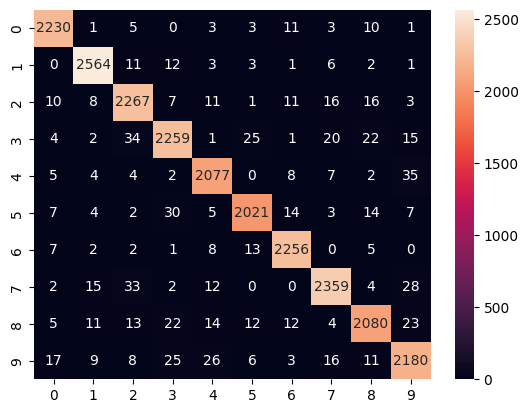

In [16]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

matrizinha = confusion_matrix(y_test, y_pred)

sns.heatmap(matrizinha, annot=True, fmt="d")